![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [2]:
import pandas as pd
import numpy as np

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [3]:
beers = pd.read_csv("data/datasets_beers.csv")

In [270]:
beers.head(10)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [259]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [260]:
print(beers.columns)

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')


In [5]:
beers.shape
beers.ndim

2

In [4]:
# SUSTITUIMOS LOS NAN DE IBU POR LA MEDIA
beers["ibu"] = beers["ibu"].fillna(beers["ibu"].mean())
beers

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,42.713167,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,42.713167,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,42.713167,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,42.713167,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,42.713167,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.000000,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,42.713167,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,42.713167,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.000000,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [272]:
beers.drop("Unnamed: 0", axis = 1,inplace = True)
beers

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,42.713167,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,42.713167,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,42.713167,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,42.713167,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,42.713167,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.000000,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,42.713167,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,42.713167,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.000000,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [273]:
print(len(beers.index), "filas")
print(len(beers.columns), "columnas")

2410 filas
7 columnas


## Ejercicio 5
¿De qué tipo son los datos?

In [6]:
beers.dtypes

Unnamed: 0      int64
abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [277]:
beers_2 = beers.describe()
beers_2

,abv,ibu,id,brewery_id,ounces
count,2348.000000,2410.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,19.813927,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,30.000000,808.250000,93.000000,12.000000
50%,0.056000,42.713167,1453.500000,205.000000,12.000000
75%,0.067000,42.713167,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [278]:
beers["style"].nunique()

99

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [279]:
print(beers.iloc[10:21,::])

      abv        ibu    id                          name  \
10  0.072  42.713167  2099             Sophomoric Saison   
11  0.073  42.713167  2098         Regional Ring Of Fire   
12  0.069  42.713167  2097                    Garce Selé   
13  0.085  42.713167  1980               Troll Destroyer   
14  0.061  60.000000  1979                  Bitter Bitch   
15  0.060  42.713167  2318                   Ginja Ninja   
16  0.060  42.713167  2170                 Cherried Away   
17  0.060  42.713167  2169                  Rhubarbarian   
18  0.060  42.713167  1502                   BrightCider   
19  0.082  42.713167  1593   He Said Baltic-Style Porter   
20  0.082  42.713167  1592  He Said Belgian-Style Tripel   

                      style  brewery_id  ounces  
10   Saison / Farmhouse Ale         177    12.0  
11   Saison / Farmhouse Ale         177    12.0  
12   Saison / Farmhouse Ale         177    12.0  
13              Belgian IPA         177    12.0  
14  American Pale Ale (APA)  

In [280]:
print(beers.iloc[10:21,3::])

                            name                    style  brewery_id  ounces
10             Sophomoric Saison   Saison / Farmhouse Ale         177    12.0
11         Regional Ring Of Fire   Saison / Farmhouse Ale         177    12.0
12                    Garce Selé   Saison / Farmhouse Ale         177    12.0
13               Troll Destroyer              Belgian IPA         177    12.0
14                  Bitter Bitch  American Pale Ale (APA)         177    12.0
15                   Ginja Ninja                    Cider         154    12.0
16                 Cherried Away                    Cider         154    12.0
17                  Rhubarbarian                    Cider         154    12.0
18                   BrightCider                    Cider         154    12.0
19   He Said Baltic-Style Porter            Baltic Porter         368    12.0
20  He Said Belgian-Style Tripel                   Tripel         368    12.0


In [281]:
beers.loc[10:20, ['abv', 'ibu', 'ounces']]

,abv,ibu,ounces
10,0.072,42.713167,12.0
11,0.073,42.713167,12.0
12,0.069,42.713167,12.0
13,0.085,42.713167,12.0
14,0.061,60.000000,12.0
15,0.060,42.713167,12.0
16,0.060,42.713167,12.0
17,0.060,42.713167,12.0
18,0.060,42.713167,12.0
19,0.082,42.713167,12.0


In [282]:
array = (beers.loc[10:20, ['abv', 'ibu', 'ounces']]).to_numpy()
print(array)

[[ 0.072      42.71316726 12.        ]
 [ 0.073      42.71316726 12.        ]
 [ 0.069      42.71316726 12.        ]
 [ 0.085      42.71316726 12.        ]
 [ 0.061      60.         12.        ]
 [ 0.06       42.71316726 12.        ]
 [ 0.06       42.71316726 12.        ]
 [ 0.06       42.71316726 12.        ]
 [ 0.06       42.71316726 12.        ]
 [ 0.082      42.71316726 12.        ]
 [ 0.082      42.71316726 12.        ]]


## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [284]:
sum(beers["ounces"])

32757.300000000014

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [285]:
print(beers["ibu"].mean())
print(beers["ibu"].max())
print(beers["ibu"].min())

42.71316725978647
138.0
4.0


In [286]:
beers.loc[beers["ibu"].idxmax()]["name"]

'Bitter Bitch Imperial IPA'

In [287]:
beers.loc[beers["ibu"].idxmin()]["name"]

'Summer Solstice'

## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [288]:
print(beers["ibu"].mean())
print(beers["ibu"].median())
print(beers["ibu"].mode())

42.71316725978647
42.71316725978647
0    42.713167
Name: ibu, dtype: float64


In [289]:
rango_beers = beers["ibu"].max() - beers["ibu"].min()
rango_beers

np.float64(134.0)

In [290]:
print(beers["ibu"].std())
print(beers["ibu"].var())

19.813926931806947
392.59170045898463


MEDIA: 42.71  
MODA: 0 y 20  
MEDIANA: 35
RANGO: 134 valores de rango  
DESVIACION TIPICA: 25.95  
VARIANZA: 673.61  

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [291]:
import seaborn as sns

In [292]:
beers.corr(numeric_only = True)

,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.520011,0.042811,-0.098632,0.172529
ibu,0.520011,1.000000,0.000373,-0.003549,0.039995
id,0.042811,0.000373,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.003549,-0.504030,1.000000,-0.133762
ounces,0.172529,0.039995,0.100843,-0.133762,1.000000


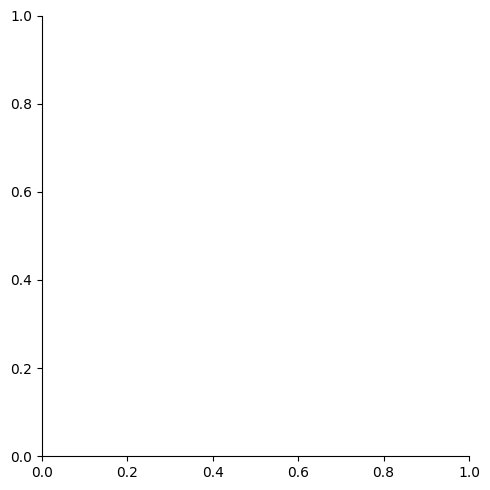

In [293]:
sns.lmplot(data=beers.corr(numeric_only = True));

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

<Axes: >

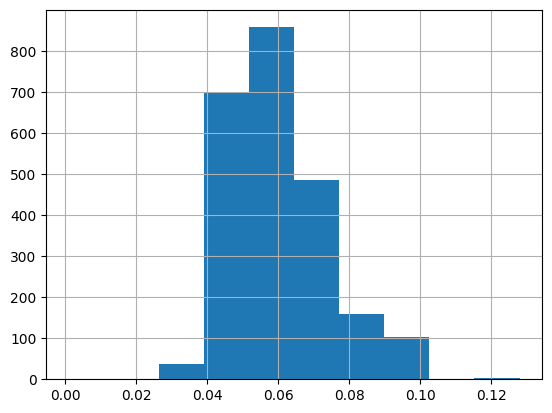

In [294]:
beers["abv"].hist()

distribución asimétrica

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

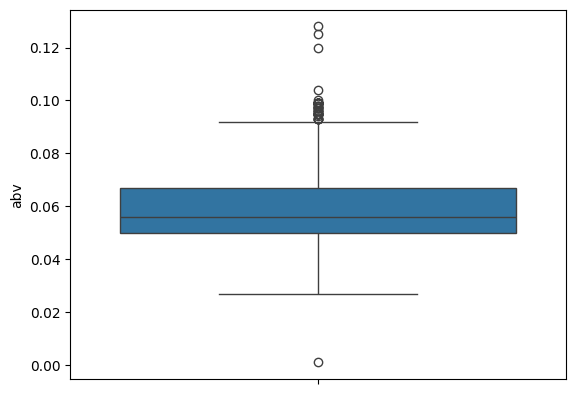

In [295]:
sns.boxplot(beers["abv"]);

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [8]:
beers.groupby('style')['abv'].mean().sort_values(ascending= False).iloc[:10]

style
English Barleywine                  0.107667
Quadrupel (Quad)                    0.104000
American Barleywine                 0.099000
American Malt Liquor                0.099000
Russian Imperial Stout              0.097636
American Double / Imperial Stout    0.093667
American Double / Imperial IPA      0.087369
Tripel                              0.086818
Baltic Porter                       0.085167
Belgian Strong Pale Ale             0.084000
Name: abv, dtype: float64

In [10]:
beers.groupby('style')['abv'].mean().idxmax()

'English Barleywine'

In [11]:
beers.groupby('style')['ibu'].mean().sort_values(ascending = False).iloc[:10]

style
American Double / Imperial IPA        78.860905
American Barleywine                   78.237722
Russian Imperial Stout                74.558137
English Barleywine                    66.666667
American Double / Imperial Pilsner    63.856584
American India Pale Lager             63.333333
American Strong Ale                   62.173310
American IPA                          60.404999
American Black Ale                    57.261408
English Stout                         54.356584
Name: ibu, dtype: float64

In [299]:
beers.groupby('style')['ibu'].mean().idxmax()

'American Double / Imperial IPA'

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [13]:
breweries = pd.read_csv("data/datasets_breweries.csv")
breweries

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [14]:
breweries = breweries.rename(columns={'Unnamed: 0': 'brewery_id', 'name': 'Brewery name'})
breweries

,brewery_id,Brewery name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [15]:
combinado = pd.merge(breweries, beers)
combinado

,brewery_id,Brewery name,city,state,Unnamed: 0,abv,ibu,id,name,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,1493,0.045,50.000000,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,1494,0.049,26.000000,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,1495,0.048,19.000000,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,1496,0.060,38.000000,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,1497,0.060,25.000000,2688,Stronghold,American Porter,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2405,556,Butternuts Beer and Ale,Garrattsville,NY,488,0.049,42.713167,52,Heinnieweisse Weissebier,Hefeweizen,12.0
2406,556,Butternuts Beer and Ale,Garrattsville,NY,489,0.068,42.713167,51,Snapperhead IPA,American IPA,12.0
2407,556,Butternuts Beer and Ale,Garrattsville,NY,490,0.049,42.713167,50,Moo Thunder Stout,Milk / Sweet Stout,12.0
2408,556,Butternuts Beer and Ale,Garrattsville,NY,491,0.043,42.713167,49,Porkslap Pale Ale,American Pale Ale (APA),12.0


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [303]:
combinado["state"].nunique()

51

In [304]:
combinado["city"].nunique()

384

In [305]:
combinado["Brewery name"].nunique()

551

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [306]:
combinado.groupby(["state","city"])["abv"].aggregate(["mean", "median","max"])

mean  median    max
state city                               
AK    Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
AL    Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
WI    Wilson      0.055000  0.0550  0.055
WV    Lewisburg   0.062000  0.0620  0.067
WY    Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [20]:
combinado[combinado["state"] == " IN"].sort_values(by='ibu', ascending=False)[:3]

,brewery_id,Brewery name,city,state,Unnamed: 0,abv,ibu,id,name,style,ounces
145,17,Tin Man Brewing Company,Evansville,IN,2191,0.085,115.0,1449,Overlord Imperial IPA,American Double / Imperial IPA,16.0
166,24,Burn 'Em Brewing,Michigan City,IN,479,0.099,115.0,2471,Hopkick Dropkick,American Double / Imperial IPA,12.0
140,16,Flat 12 Bierwerks,Indianapolis,IN,811,0.060,104.0,1610,Half Cycle IPA,American IPA,16.0


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [308]:
combinado.groupby("city")["ibu"].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.000000,135.000000,135.000000,135.000000,135.000000
Abita Springs,3.0,27.333333,21.455380,13.000000,15.000000,17.000000,34.500000,52.000000
Ada,1.0,42.713167,NaN,42.713167,42.713167,42.713167,42.713167,42.713167
Afton,4.0,43.000000,19.899749,22.000000,28.000000,45.000000,60.000000,60.000000
Airway Heights,5.0,42.713167,0.000000,42.713167,42.713167,42.713167,42.713167,42.713167
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.000000,39.750000,44.000000,51.000000,72.000000
Worcester,1.0,69.000000,NaN,69.000000,69.000000,69.000000,69.000000,69.000000
Yakima,2.0,54.000000,22.627417,38.000000,46.000000,54.000000,62.000000,70.000000


## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [309]:
combinado[combinado["abv"] >= 0.07].sort_values(by = "abv")

,brewery_id,Brewery name,city,state,abv,ibu,id,name,style,ounces
86,10,Brewery Vivant,Grand Rapids,MI,0.070,42.713167,1997,Pumpkin Tart,Fruit / Vegetable Beer,16.0
59,10,Brewery Vivant,Grand Rapids,MI,0.070,42.713167,2548,Beasts A'Burnin',Rauchbier,16.0
2234,489,Blue Point Brewing Company,Patchogue,NY,0.070,42.713167,939,Toxic Sludge,American Black Ale,16.0
2239,490,Tampa Bay Brewing Company,Tampa,FL,0.070,80.000000,544,Old Elephant Foot IPA,American IPA,16.0
2249,494,Seven Brides Brewery,Silverton,OR,0.070,105.000000,918,Frankenlou's IPA,American IPA,16.0
...,...,...,...,...,...,...,...,...,...,...
335,46,Sixpoint Craft Ales,Brooklyn,NY,0.100,52.000000,2574,4Beans,Baltic Porter,12.0
375,51,Upslope Brewing Company,Boulder,CO,0.104,42.713167,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,19.2
143,17,Tin Man Brewing Company,Evansville,IN,0.120,90.000000,2621,Csar,Russian Imperial Stout,16.0
7,1,Against the Grain Brewery,Louisville,KY,0.125,80.000000,2685,London Balling,English Barleywine,16.0


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [310]:
# MEDIA GLOBAL
amargor = combinado['ibu'].mean()

In [311]:
# MEDIA DE CADA ESTADO
estados = combinado.groupby("state")["ibu"].mean().reset_index()

In [312]:
# LISTADO DE ESTADOS CON MAYOR MEDIA QUE EL GLOBAL
listado = estados[estados['ibu'] > amargor]
listado

,state,ibu
1,AL,50.371317
4,CA,45.345530
5,CO,45.312705
7,DC,48.981584
8,DE,47.356584
9,FL,45.292698
10,GA,44.276157
13,ID,49.742372
15,IN,42.893756
21,ME,45.343087


In [313]:
ibu_tabla = pd.merge(combinado,listado, on="ibu")
ibu_tabla [["name", "ibu","state_x","state_y"]]

,name,ibu,state_x,state_y


In [314]:
# HASTA AQUÍ LLEGUÉ SOLO CON BÚSQUEDAS EN INTERNET Y DUDAS A CHATGPT, 
# LA TABLA A CONTINUACION ES LA QUE YA ME GENERO CHAT GPT AL NO ENTENDER COMO PODER TENER UNA SOLA COLUMNA DE STATE O DE IBU
pd.merge(combinado, listado, on='state', suffixes=('', '_state_mean'))

,brewery_id,Brewery name,city,state,abv,ibu,id,name,style,ounces,ibu_state_mean
0,0,NorthGate Brewing,Minneapolis,MN,0.045,50.000000,2692,Get Together,American IPA,16.0,48.771246
1,0,NorthGate Brewing,Minneapolis,MN,0.049,26.000000,2691,Maggie's Leap,Milk / Sweet Stout,16.0,48.771246
2,0,NorthGate Brewing,Minneapolis,MN,0.048,19.000000,2690,Wall's End,English Brown Ale,16.0,48.771246
3,0,NorthGate Brewing,Minneapolis,MN,0.060,38.000000,2689,Pumpion,Pumpkin Ale,16.0,48.771246
4,0,NorthGate Brewing,Minneapolis,MN,0.060,25.000000,2688,Stronghold,American Porter,16.0,48.771246
...,...,...,...,...,...,...,...,...,...,...,...
1283,555,Ukiah Brewing Company,Ukiah,CA,0.055,42.713167,98,Pilsner Ukiah,German Pilsener,12.0,45.345530
1284,556,Butternuts Beer and Ale,Garrattsville,NY,0.049,42.713167,52,Heinnieweisse Weissebier,Hefeweizen,12.0,44.756334
1285,556,Butternuts Beer and Ale,Garrattsville,NY,0.068,42.713167,51,Snapperhead IPA,American IPA,12.0,44.756334
1286,556,Butternuts Beer and Ale,Garrattsville,NY,0.049,42.713167,50,Moo Thunder Stout,Milk / Sweet Stout,12.0,44.756334
